# PCA through Singular Value Decomposition

In [ ]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])

# Calculate the covariance matrix:
R=np.matmul(X,X.T)/3
'''
print(X)
print(X.T)
Raltern=X@np.transpose(X)/3
print(Raltern)
print(R)
'''

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]
print(u1)
print(u2)

# Calculate the coordinates in new orthonormal basis:
X_new = np.matmul(U.T, X)
print(X_new)

# Calculate the approximation of the original from new basis
X_reconstructed = np.matmul(U, X_new)
print(X_reconstructed)
#print(Xi1[:,None]) # add second dimention to array and test it


# Check that you got the original
print(X - X_reconstructed)

[-0.40455358 -0.9145143 ]
[-0.9145143   0.40455358]
[[-4.46716435 -3.14809647  0.        ]
 [-0.21081425  0.29914646  0.        ]]
rrr [[2. 1. 0.]
 [4. 3. 0.]]
[[-1.77635684e-15 -1.11022302e-15  0.00000000e+00]
 [-1.77635684e-15 -8.88178420e-16  0.00000000e+00]]


# PCA on Iris data

In [4]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

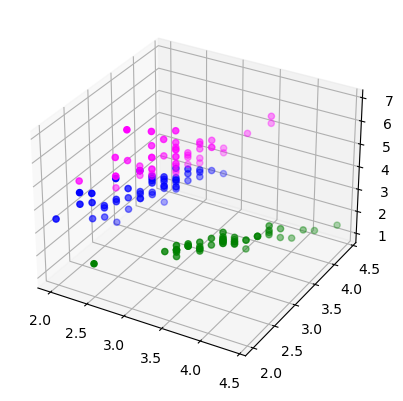

In [5]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

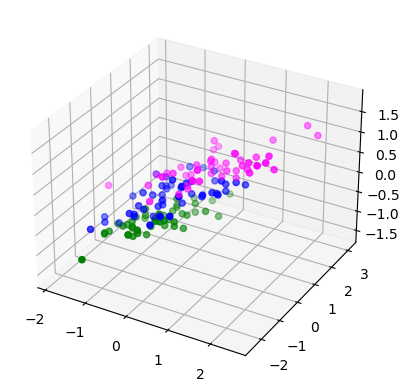

In [6]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

Xscaler = StandardScaler() 
Xpp=Xscaler.fit_transform(X)

# you can plot the feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpp[y==0,0],Xpp[y==0,1],Xpp[y==0,2],color='green')
axes2.scatter3D(Xpp[y==1,0],Xpp[y==1,1],Xpp[y==1,2],color='blue')
axes2.scatter3D(Xpp[y==2,0],Xpp[y==2,1],Xpp[y==2,2],color='magenta')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

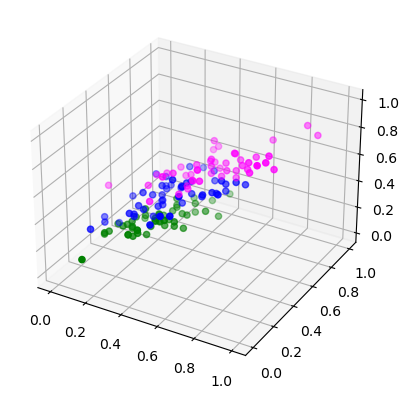

In [7]:
#with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

Xscaler = MinMaxScaler() 
Xpp=Xscaler.fit_transform(X)

# you can plot the feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpp[y==0,0],Xpp[y==0,1],Xpp[y==0,2],color='green')
axes2.scatter3D(Xpp[y==1,0],Xpp[y==1,1],Xpp[y==1,2],color='blue')
axes2.scatter3D(Xpp[y==2,0],Xpp[y==2,1],Xpp[y==2,2],color='magenta')
plt.show


[[ 0.05290845 -0.00491134  0.05999602  0.05975355]
 [-0.00491134  0.03298254 -0.02328082 -0.02111795]
 [ 0.05999602 -0.02328082  0.08952249  0.09149784]
 [ 0.05975355 -0.02111795  0.09149784  0.10086914]]


<function matplotlib.pyplot.show(close=None, block=None)>

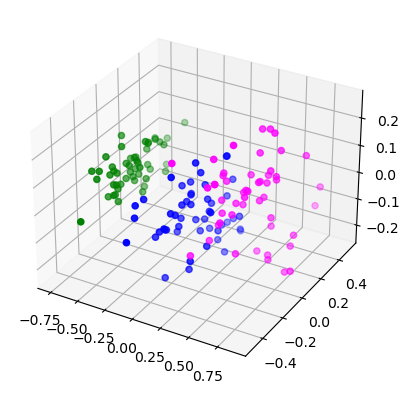

In [8]:
# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())

# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show


In [9]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([0.23245325, 0.0324682 , 0.00959685])

In [10]:
pca.explained_variance_ratio_ #explain the percentage of information that is in each feature 

array([0.84136038, 0.11751808, 0.03473561])

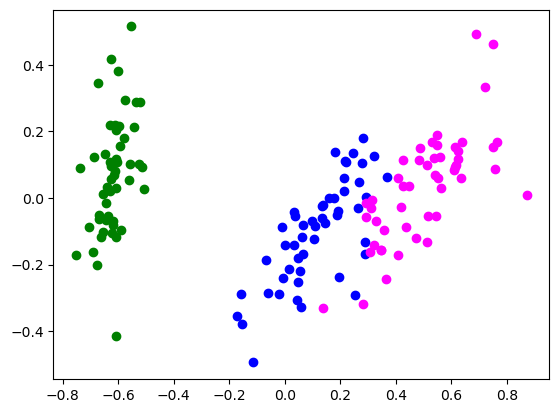

In [11]:
# Plot the principal components in 2D, mark different targets in color
plt.scatter(Xpca[y==0,0],Xpca[y==0,1],color='green')
plt.scatter(Xpca[y==1,0],Xpca[y==1,1],color='blue')
plt.scatter(Xpca[y==2,0],Xpca[y==2,1],color='magenta')


# KNN classifier

## $X_{pp}$ + KNN 

(105, 4)
(45, 4)
[[15  0  0]
 [ 0 14  0]
 [ 0  1 15]]


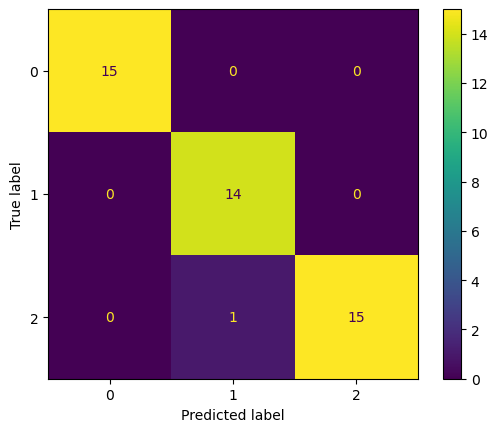

In [12]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(Xpp,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)



We obtain a quite nice classification 

## $X_{PCA}$ + KNN

(105, 3)
(45, 3)
[[13  0  0]
 [ 0 20  2]
 [ 0  0 10]]


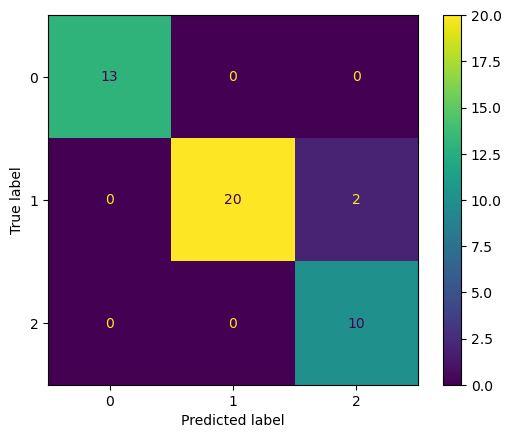

In [13]:
X_train, X_test, y_train, y_test = train_test_split(Xpca,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

# Import and show confusion matrix
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)



From time to time we have some misclassification but it's quite good in general 

## $X_{pca}$ without 3rd feature + KNN 

(105, 2)
(45, 2)
[[16  0  0]
 [ 0 13  1]
 [ 0  2 13]]


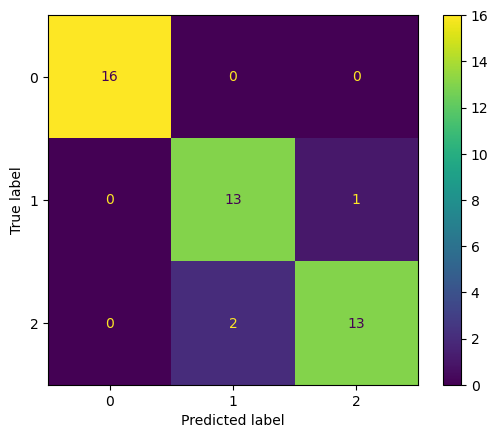

In [14]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns). 
# Compare the results with full dataset
X_train, X_test, y_train, y_test = train_test_split(Xpca[:,0:2],y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

# Import and show confusion matrix
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)



We get a fine classification and as before from time to time we have some errors 

## $X_{pca}$ without 1st feature + KNN 

(105, 2)
(45, 2)
[[11  2  2]
 [ 6  8  1]
 [ 5  2  8]]


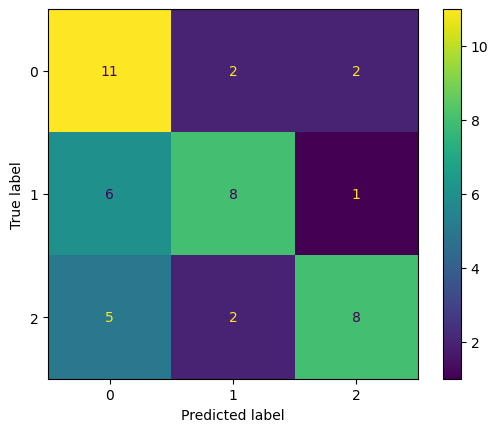

In [15]:
X_train, X_test, y_train, y_test = train_test_split(Xpca[:,1:3],y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

# Import and show confusion matrix
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)



The classification doesn't work